## Notebook to make Fig. 5 - corner plots

In [1]:
import json
import glob
import matplotlib.pylab as plt
from matplotlib.lines import Line2D
import numpy as np
from scipy.special import erf
import sys
import makeCorner
import importlib

import seaborn as sns
sns.set_palette('colorblind')

Load `.json` result files which contain `emcee` hierarchical inference results

In [2]:
# Data directory 
f_root = '/home/simona.miller/measuring-bbh-component-spin/Data/PopulationInferenceOutput/'

# For loading files
model = 'betaPlusDoubleGaussian2'
pops = ['1', '2', '3']
nevents = ['70', '300'] 
date = '110623'

# Make Dict
data_dict = {}

# Cycle through the different populations and no. of events
for pop in pops: 
    data_pop = {}
    for nevent in nevents: 
        
        print(pop, nevent)
        
        name = f"{date}_{model}_pop{pop}_{nevent}events"
        
        with open(f_root+f'{model}/{name}.json', 'r') as f:
            data = json.load(f)
            
        data_pop[nevent+' events'] = data    
            
    data_dict['pop '+pop] = data_pop

1 70
1 300
2 70
2 300
3 70
3 300


In [3]:
# Names of populations from paper for plotting below
population_labels_dict = {
    'pop 1':r'$\mathrm{\textsc{HighSpinPrecessing}}$', 
    'pop 2':r'$\mathrm{\textsc{MediumSpin}}$', 
    'pop 3':r'$\mathrm{\textsc{LowSpinAligned}}$'
}

# Colors corresponding to different numbers of events
nevents_colors_dict = {
    '70 events':'C4', 
    '300 events':'#004f7a'
}

# For legend 
lgd_handles = [Line2D([], [], color=color, label=label) for label,color in nevents_colors_dict.items()]
lgd_handles.append(Line2D([], [], color='k', ls='--', label='truth'))

# True mu_chi, sigma_chi, mu1_cost, sigma1_cost, mu2_cost, sigma2_cost, f, Bq:
hyperparams = { 
    '1':[0.55, 0.26, 0.42, 0.75, 0.19, 0.18, 0.45, 0.96],  
    '2':[0.32, 0.16, 0.33, 0.64, 0.59, 0.40, 0.36, 0.96],
    '3':[0.19, 0.12, -0.98, 0.44, 0.98, 0.31, 0.26, 0.96]
}

Make a corner plot showing posteriors on our each set of parameters:

FileNotFoundError: [Errno 2] No such file or directory: ''

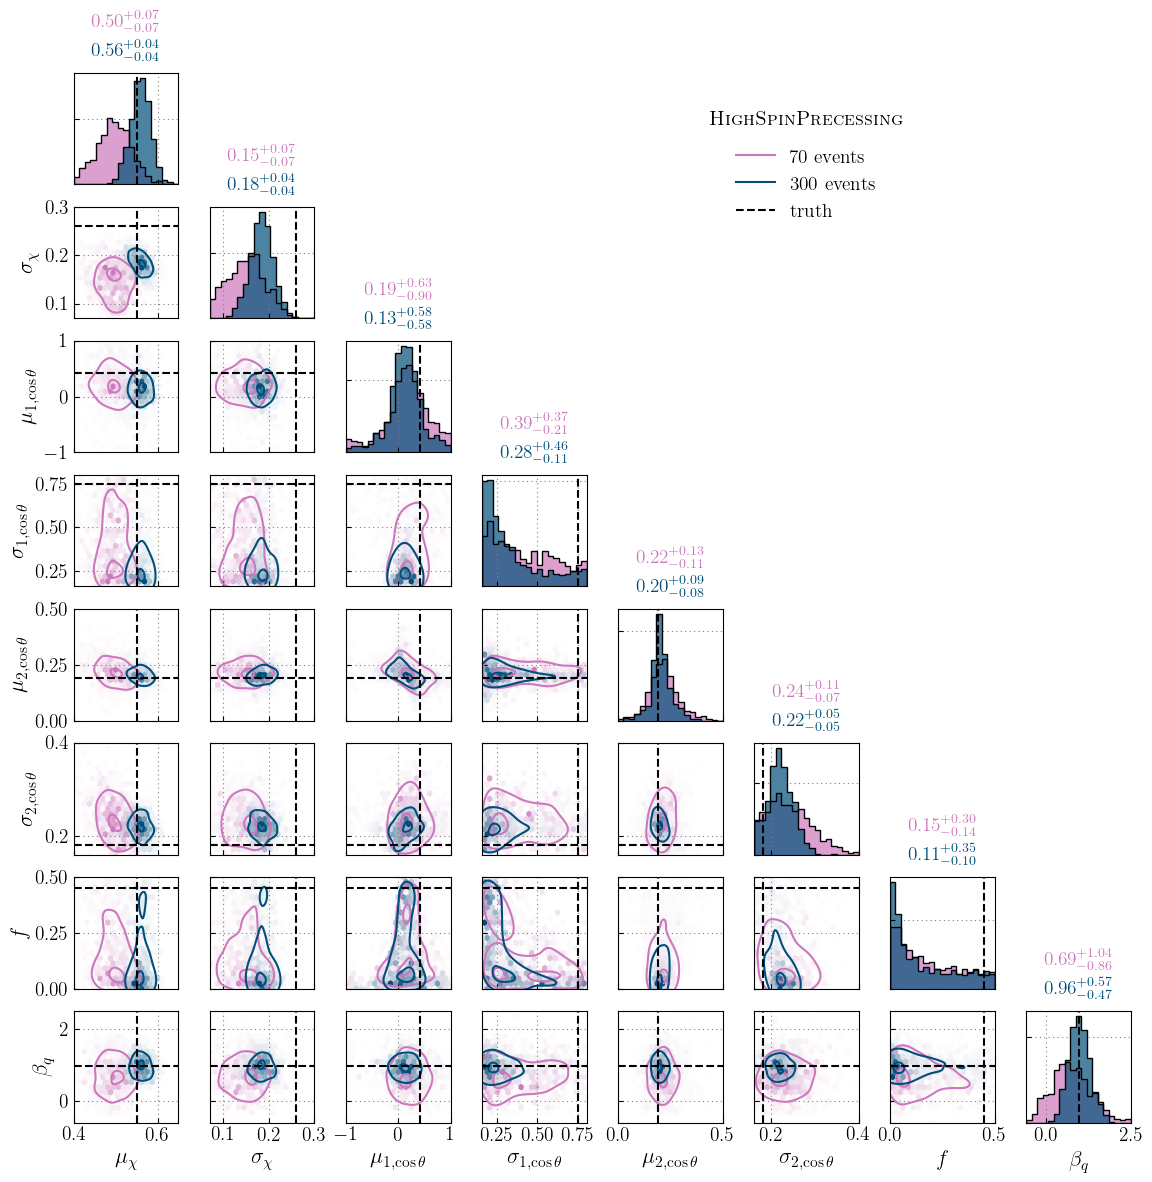

In [4]:
## Population 1: HighSpinPrecessing

# Get data
pop = '1'
pop_key = f'pop {pop}'
data = data_dict[pop_key]

# Format data 
toPlot = {
    "mu_chi":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['mu_chi']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.4,0.65), "label":r"$\mu_\chi$", "true_val":hyperparams[pop][0]
    },
    "sigma_chi":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['sigma_chi']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.07,0.3), "label":r"$\sigma_\chi$", "true_val":hyperparams[pop][1]
    },
    "mu1_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['mu1_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(-1,1), "label":r"$\mu_{1, \cos \theta}$", "true_val":hyperparams[pop][2]
    },
    "sigma1_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['sigma1_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.16,0.8), "label":r"$\sigma_{1, \cos \theta}$", "true_val":hyperparams[pop][3] 
    }, 
     "mu2_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['mu2_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0,0.5), "label":r"$\mu_{2, \cos \theta}$" , "true_val":hyperparams[pop][4]
    },
    "sigma2_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['sigma2_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.16,0.4), "label":r"$\sigma_{2, \cos \theta}$" , "true_val":hyperparams[pop][5]
    }, 
     "MF_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['MF_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0,0.5), "label":r"$f$" , "true_val":hyperparams[pop][6]
    },
    "Bq":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['Bq']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(-0.6,2.5), "label":r"$\beta_q$" , "true_val":hyperparams[pop][7]
    }
}

# Plot
importlib.reload(makeCorner)
fig = plt.figure(figsize=(15/1.1, 15/1.1))
fig = makeCorner.plot_corner(fig,toPlot,labelsize=16)

# add legend
lgd_ax = fig.axes[0]
lgd_ax.legend(handles=lgd_handles, loc='center', bbox_to_anchor=(7, 0.0))
lgd_ax.text(7, 0.5, population_labels_dict[pop_key], fontsize=14, transform=lgd_ax.transAxes, 
         horizontalalignment='center', verticalalignment='bottom')

plt.subplots_adjust(wspace=0.3)

plt.savefig('figure_05a.pdf',bbox_inches='tight')
plt.show()

In [ ]:
## Population 2: MediumSpin

# Get data
pop = '2'
pop_key = f'pop {pop}'
data = data_dict[pop_key]

# Format data 
toPlot = {
    "mu_chi":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['mu_chi']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.2,0.4), "label":r"$\mu_\chi$", "true_val":hyperparams[pop][0]
    },
    "sigma_chi":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['sigma_chi']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.07,0.25), "label":r"$\sigma_\chi$", "true_val":hyperparams[pop][1]
    },
    "mu1_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['mu1_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(-1,1), "label":r"$\mu_{1, \cos \theta}$", "true_val":hyperparams[pop][2]
    },
    "sigma1_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['sigma1_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.16,0.8), "label":r"$\sigma_{1, \cos \theta}$", "true_val":hyperparams[pop][3] 
    }, 
     "mu2_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['mu2_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0,1), "label":r"$\mu_{2, \cos \theta}$" , "true_val":hyperparams[pop][4]
    },
    "sigma2_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['sigma2_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.16,0.8), "label":r"$\sigma_{2, \cos \theta}$" , "true_val":hyperparams[pop][5]
    }, 
     "MF_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['MF_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0,0.5), "label":r"$f$" , "true_val":hyperparams[pop][6]
    },
    "Bq":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['Bq']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(-0.6,4), "label":r"$\beta_q$" , "true_val":hyperparams[pop][7]
    }
}

# Plot
importlib.reload(makeCorner)
fig = plt.figure(figsize=(15/1.1, 15/1.1))
fig = makeCorner.plot_corner(fig,toPlot,labelsize=16)

# add legend
lgd_ax = fig.axes[0]
lgd_ax.legend(handles=lgd_handles, loc='center', bbox_to_anchor=(7, 0.0))
lgd_ax.text(7, 0.5, population_labels_dict[pop_key], fontsize=14, transform=lgd_ax.transAxes, 
         horizontalalignment='center', verticalalignment='bottom')

plt.subplots_adjust(wspace=0.3)

makeCorner.add_mu_sigma_prior(axes[0])

plt.savefig('figure_05b.pdf',bbox_inches='tight')
plt.show()

In [ ]:
## Population 3: LowSpinAligned

# Get data
pop = '3'
pop_key = f'pop {pop}'
data = data_dict[pop_key]

# Format data
toPlot = {
    "mu_chi":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['mu_chi']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.15,0.45), "label":r"$\mu_\chi$", "true_val":hyperparams[pop][0]
    },
    "sigma_chi":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['sigma_chi']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.07,0.21), "label":r"$\sigma_\chi$", "true_val":hyperparams[pop][1]
    },
    "mu1_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['mu1_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(-1,1), "label":r"$\mu_{1, \cos \theta}$", "true_val":hyperparams[pop][2]
    },
    "sigma1_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['sigma1_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.16,0.8), "label":r"$\sigma_{1, \cos \theta}$", "true_val":hyperparams[pop][3] 
    }, 
     "mu2_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['mu2_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0,1), "label":r"$\mu_{2, \cos \theta}$" , "true_val":hyperparams[pop][4]
    },
    "sigma2_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['sigma2_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0.16,0.8), "label":r"$\sigma_{2, \cos \theta}$" , "true_val":hyperparams[pop][5]
    }, 
     "MF_cost":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['MF_cost']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(0,0.5), "label":r"$f$" , "true_val":hyperparams[pop][6]
    },
    "Bq":{
        "data":{f'{nevent} events':{'posterior':data[f'{nevent} events']['Bq']['processed'], 
                                    'color':nevents_colors_dict[f'{nevent} events']} for nevent in nevents},
        "plot_bounds":(-0.6,4), "label":r"$\beta_q$" , "true_val":hyperparams[pop][7]
    }
}

# Plot
importlib.reload(makeCorner)
fig = plt.figure(figsize=(15/1.1, 15/1.1))
fig = makeCorner.plot_corner(fig,toPlot,labelsize=16)

# add legend
lgd_ax = fig.axes[0]
lgd_ax.legend(handles=lgd_handles, loc='center', bbox_to_anchor=(7, 0.0))
lgd_ax.text(7, 0.5, population_labels_dict[pop_key], fontsize=14, transform=lgd_ax.transAxes, 
         horizontalalignment='center', verticalalignment='bottom')

plt.subplots_adjust(wspace=0.3)

makeCorner.add_mu_sigma_prior(axes[0])

plt.savefig('figure_05c.pdf',bbox_inches='tight')
plt.show()